In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [13]:
# load stock data
stocks = pd.read_csv('aapl/static_3_years_monthly_stock_adjusted.csv')

# load and clean income statement data
income = pd.read_csv('aapl/static_3_years_income.csv')
income_ignored_columns = ['investmentIncomeNet', 'depreciation']
income = income.drop(income_ignored_columns, axis=1)
income = income.fillna(0)

# load and clean balance sheet data
balance = pd.read_csv('aapl/static_3_years_balance_sheet.csv')
balance_ignored_columns = [
    'intangibleAssets', 
    'intangibleAssetsExcludingGoodwill', 
    'goodwill', 
    'treasuryStock'
]
balance = balance.drop(balance_ignored_columns, axis=1)
balance = balance.fillna(0)

#load and clean cash flow data
cash_flow = pd.read_csv('aapl/static_3_years_cash_flow.csv')
cash_flow_ignored_columns = [
    'proceedsFromOperatingActivities', 
    'paymentsForRepurchaseOfPreferredStock', 
    'dividendPayoutPreferredStock', 
    'proceedsFromIssuanceOfPreferredStock', 
    'proceedsFromSaleOfTreasuryStock', 
    'changeInExchangeRate'
]
cash_flow = cash_flow.drop(cash_flow_ignored_columns, axis=1)
cash_flow = cash_flow.fillna(0)

# load s&p 500 data
sp500 = pd.read_csv('static_3_years_sp500_monthly.csv')

# load usa data
gdp = pd.read_csv('gdp_worldbank/usa_gdp.csv')

# load usa cpi data
inflation_cpi = pd.read_csv('inflation_cpi_worldbank/usa_inflation.csv')

In [ ]:
stocks.head()
stocks_graph = stocks[['date', 'adjusted close']]
stocks_graph = stocks_graph.rename(columns={'adjusted close': 'closing price in $'})
# stocks_graph
sns.lineplot(data=stocks_graph, x='date', y='closing price in $')

In [ ]:
appl = stocks.set_index(pd.DatetimeIndex(stocks['date'].values))
# remove date value
# appl.drop(['date'], inplace=True, axis=1)
# appl_monthly_return = appl['adjusted close'].pct_change()
# appl_monthly_return = pd.DataFrame({'returns %': appl_monthly_return})
# appl_np_return = appl_monthly_return['returns %'].dropna().to_numpy()
# geom_mean_monthly = (np.prod((1 + appl_np_return)) ** 1/len(appl_np_return)) - 1
# geom_mean_monthly
# ret_percentage = (appl['adjusted close'].iloc[-1] - appl['adjusted close'].iloc[0]) / appl['adjusted close'].iloc[0]
# 1000 + (1000 * ret_percentage)
appl

In [9]:
stocks.tail()

,date,open,high,low,close,adjusted close,volume,dividend amount
33,2023-10-31,171.220,182.34,165.6700,170.77,170.3339,1.172846e+09,0.00
34,2023-11-30,171.000,192.93,170.1200,189.95,189.7089,1.099761e+09,0.24
35,2023-12-29,190.330,199.62,187.4511,192.53,192.2856,1.062318e+09,0.00
36,2024-01-31,187.150,196.38,180.1700,184.40,184.1660,1.187140e+09,0.00
37,2024-02-16,183.985,191.05,179.2500,182.31,182.3100,6.882818e+08,0.24


In [14]:
sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
33,2023-10-01,4284.520020,4393.569824,4103.779785,4193.799805,4193.799805,83519460000
34,2023-11-01,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,80970570000
35,2023-12-01,4559.430176,4793.299805,4546.500000,4769.830078,4769.830078,81530670000
36,2024-01-01,4745.200195,4931.089844,4682.109863,4845.649902,4845.649902,81737880000
37,2024-02-01,4861.109863,5048.390137,4853.520020,5005.569824,5005.569824,49900170000


In [15]:
scaler = MinMaxScaler()
stocks['normalized_adjusted_close'] = scaler.fit_transform(stocks[['adjusted close']])
sp500['normalized_adjusted_close'] = scaler.fit_transform(sp500[['Adj Close']])

# len(stocks['normalized_adjusted_close'])



In [12]:
# len(sp500['normalized_adjusted_close'])

719

In [ ]:
adjusted_close_data = pd.DataFrame({
    'date': sp500['Date'],
    'aapl': stocks['normalized_adjusted_close'],
    'sp500': sp500['normalized_adjusted_close']
})

adjusted_close_data

In [19]:
adjusted_close_data = adjusted_close_data.melt(id_vars=['date'], value_vars=['aapl', 'sp500'])
adjusted_close_data

,date,variable,value
0,2021-01-01,aapl,0.134943
1,2021-02-01,aapl,0.000000
2,2021-03-01,aapl,0.011436
3,2021-04-01,aapl,0.131057
4,2021-05-01,aapl,0.045749
...,...,...,...
71,2023-10-01,sp500,0.428311
72,2023-11-01,sp500,0.691700
73,2023-12-01,sp500,0.833980
74,2024-01-01,sp500,0.887376


<Axes: xlabel='date', ylabel='adjusted close price'>

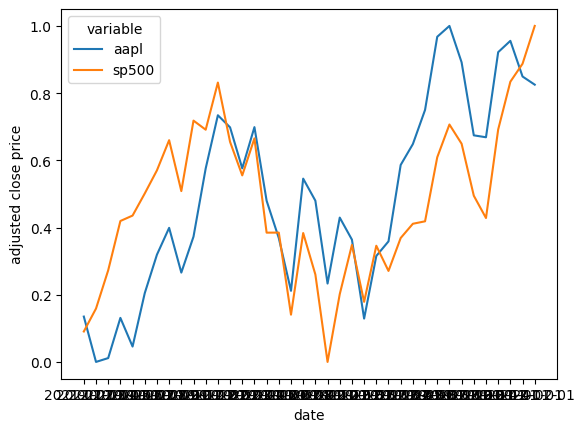

In [20]:
adjusted_close_data.rename(columns={'value': 'adjusted close price'}, inplace=True)
sns.lineplot(data=adjusted_close_data, x='date', y='adjusted close price', hue='variable')